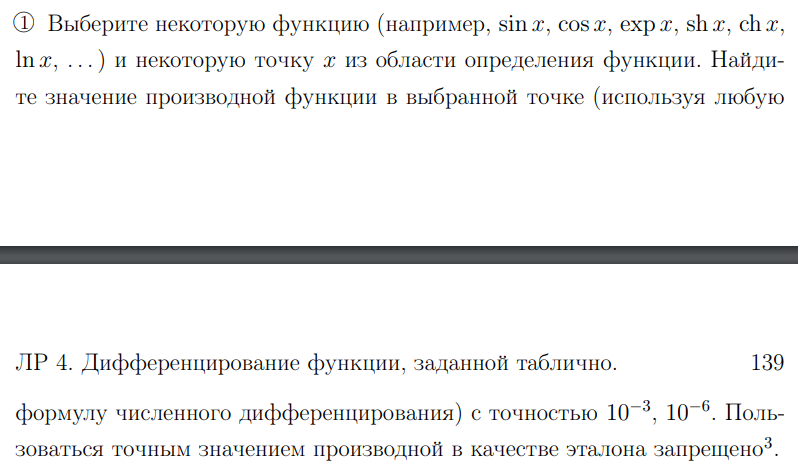

0.4999980926659191


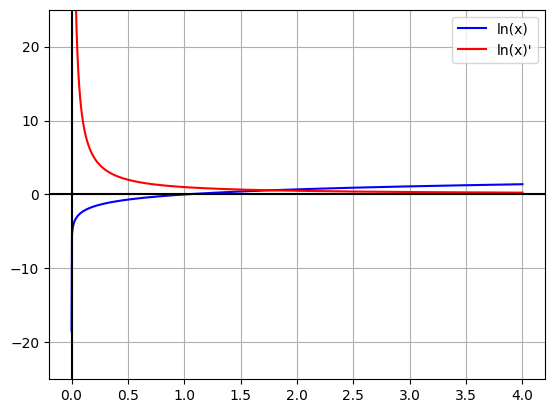

In [1]:
from typing import Union, Callable

import matplotlib.pyplot as plt
import numpy as np
from numpy import log

np.seterr(all='raise')


def diff(f: Callable, x: Union[int, float], accuracy: Union[int, float]):
    h = 1
    diff_val = (f(x + h) - f(x)) / h
    next_diff_val = (f(x + h/2) - f(x)) / (h/2)
    while abs(next_diff_val-diff_val)>accuracy:
        h=h/2
        diff_val=next_diff_val
        next_diff_val=(f(x + h/2) - f(x)) / (h/2)


    return diff_val


fig, ax = plt.subplots()
f = log
print(diff(f, 2, 10**(-6)))
x = np.linspace(0.00000001, 4, 1000)
y = f(x)
y_diff = list(diff(f, i, 0.001) for i in x)
plt.plot(x, y, 'b', label='ln(x)')
plt.plot(x, y_diff, 'r',label="ln(x)'")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim([-25,25])
plt.legend()
plt.grid()
plt.show()


Вычислена производная в точке. В качестве численного дифференцирования был взят метод с приращением в одну сторону. По погрешности понятно, что остаточный член линейный и точность достигается до нужного знака.

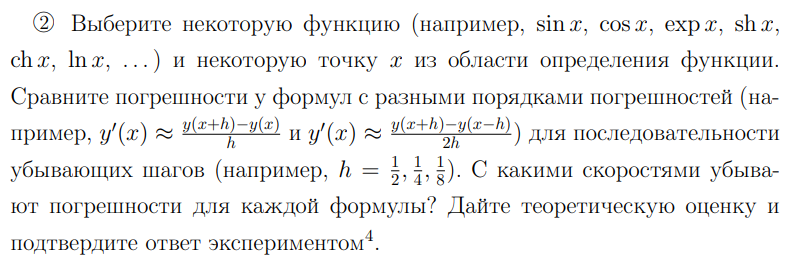

Delta h
  h=0.5,		delta=0.024845039997114293,		relative delta=1.6430641498261442
  h=0.25,		delta=0.01386483190594534,		relative delta=1.7919467156655942
  h=0.125,		delta=0.007349564136579723,		relative delta=1.8864835585199258
Delta 2h
  h=0.5,		delta=0.008196767204178501,  	relative delta=4.694597224677528
  h=0.25,		delta=0.001976284745787815,  	relative delta=4.147563867832713
  h=0.125,		delta=0.0004897159653527439,  	relative delta=4.0355734458530295


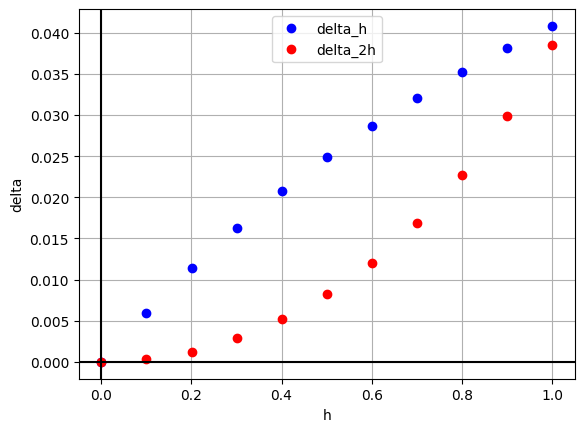

In [2]:
from typing import Callable, Union
from numbers import Real, Rational
from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np
from numpy import log


def diff_h(f: Callable, x: Real, h: float):
    return (f(x + h) - f(x)) / h


def diff_2h(f: Callable, x: Real, h: float) -> float:
    return (f(x + h) - f(x - h)) / (2 * h)


def delta(f: Callable, x: Real, h: float, diff_to_delta:Callable) -> float:
    return abs(diff_to_delta(f, x, h) - diff_to_delta(f, x, h / 2))


print("Delta h")
last_delta = delta(log, 2, 1, diff_h)
for h in (1 / 2, 1 / 4, 1 / 8):
    print(f"  {h=},\t\tdelta={delta(log, 2, h, diff_h)},\t\trelative delta={last_delta / delta(log, 2, h, diff_h)}")
    last_delta = delta(log, 2, h, diff_h)

print("Delta 2h")
last_delta = delta(log, 2, 1, diff_2h)
for h in (1 / 2, 1 / 4, 1 / 8):
    print(f"  {h=},\t\tdelta={delta(log, 2, h, diff_2h)},  \trelative delta={last_delta / delta(log, 2, h, diff_2h)}")
    last_delta = delta(log, 2, h, diff_2h)

h=np.linspace(1/2048,1,11)
delta_h_y=list(delta(log, 2, h_i, diff_h) for h_i in h)
delta_2h_y=list(delta(log,2,h_i, diff_2h) for h_i in h)
fig,ax=plt.subplots()
plt.plot(h,delta_h_y,'bo',label="delta_h")
plt.plot(h,delta_2h_y,'ro',label="delta_2h")
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.grid()
plt.xlabel('h')
plt.ylabel('delta')
plt.legend()
plt.show()

Для первого массива теоретическая погрешность линейная, тогда как для второго квадратичная.

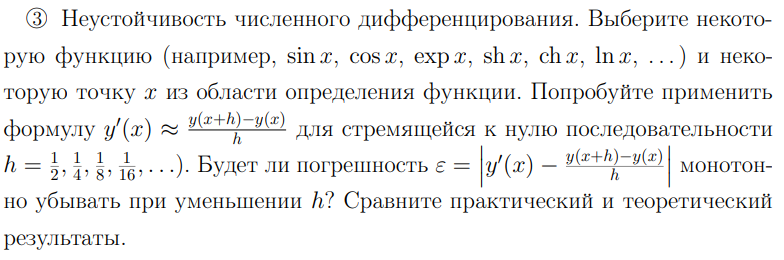

h=1, epsilon=0.0945348918918355
h=1/2, epsilon=0.05371289737158036
h=1/4, epsilon=0.028867857374466066
h=1/8, epsilon=0.015003025468520725
h=1/16, epsilon=0.007653461331941003
h=1/32, epsilon=0.0038660308491103024
h=1/64, epsilon=0.0019430117084837661
h=1/128, epsilon=0.0009740267958591176
h=1/256, epsilon=0.00048764639697651546
h=1/512, epsilon=0.00024398179562012956
h=1/1024, epsilon=0.00012203059054627374
h=1/2048, epsilon=6.102522388573561e-05
h=1/4096, epsilon=3.051509474971681e-05
h=1/8192, epsilon=1.5258167877618689e-05
h=1/16384, epsilon=7.629238098161295e-06
h=1/32768, epsilon=3.814657247858122e-06
h=1/65536, epsilon=1.9073340808972716e-06
h=1/131072, epsilon=9.5367431640625e-07
h=1/262144, epsilon=4.76837158203125e-07
h=1/524288, epsilon=2.384185791015625e-07
h=1/1048576, epsilon=1.1920928955078125e-07
h=1/2097152, epsilon=5.960464477539063e-08
h=1/4194304, epsilon=2.9802322387695312e-08
h=1/8388608, epsilon=1.4901161193847656e-08
h=1/16777216, epsilon=7.450580596923828e-09
h

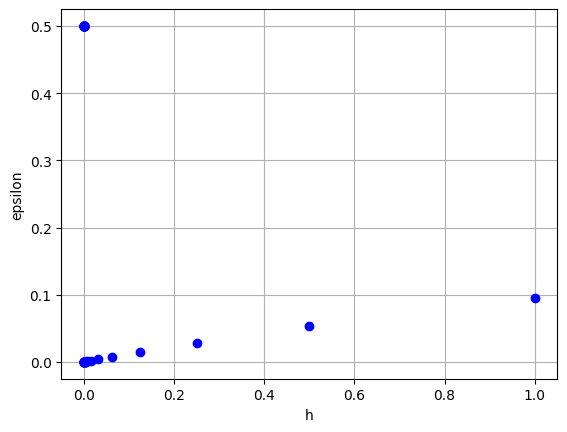

In [4]:
import fractions
import matplotlib.pyplot as plt
from numpy import log

F = log
DERIVATIVE = lambda x: 1 / x


def epsilon(x: float, h: float) -> float:
    return abs(DERIVATIVE(x) - (F(x + h) - F(x)) / h)


h = tuple(fractions.Fraction(1,(2 ** (i))) for i in range(100))
y = tuple(epsilon(2, float(h_i)) for h_i in h)
assert len(h)==len(y)
for i in range(len(y)):
    print(f'h={h[i]}, epsilon={y[i]}')


fig,ax=plt.subplots()
plt.plot(h,y,'bo')
plt.xlabel('h')
plt.ylabel('epsilon')
plt.grid()
plt.show()


Погрешность убывает не монотонно. Ее увеличение объясняется тем, что значащие цифры выходят за пределы мантиссы, приращение становится нулевым и численная производная равна нулю